# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preparation**

### Import dataset

In [2]:
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
display(data)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Inspect data information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


⚠️ The data has 219 missing values in the **Sleep Disorder** column

### Clean data

Replace null value in the **Sleep Disorder** column with 'None' to avoid data misunderstanding

In [4]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

Replace 'Normal Weight' with 'Normal' in the **BMI Category** column to improve data consistency

In [5]:
data['BMI Category'] = data['BMI Category'].replace('Normal Weight',
                                                    'Normal')

Separate **Blood Pressure** into systolic and diastolic blood pressure

In [6]:
data[['Systole',
      'Diastole']] = data['Blood Pressure'].str.split('/', expand=True)

Fix data types

In [7]:
data['Person ID'] = data['Person ID'].astype('object')
data['Systole'] = pd.to_numeric(data['Systole'])
data['Diastole'] = pd.to_numeric(data['Diastole'])

Rearrange columns

In [8]:
data = data[['Person ID',
             'Gender',
             'Age',
             'Occupation',
             'Sleep Duration',
             'Quality of Sleep',
             'Physical Activity Level',
             'Stress Level',
             'BMI Category',
             'Systole',
             'Diastole',
             'Heart Rate',
             'Daily Steps',
             'Sleep Disorder']]

Check for duplicates

In [9]:
data.duplicated().sum()

0

✅ The data does not have any duplicate value

Check for outliers with boxplot

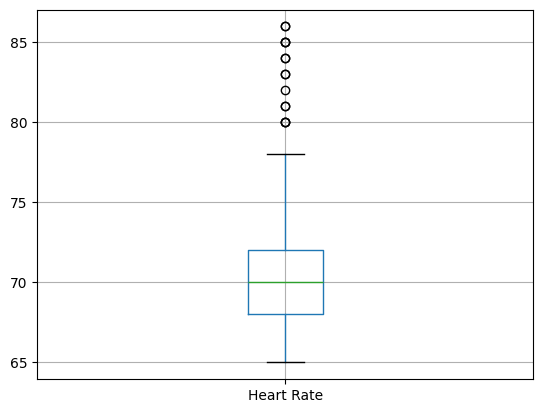

In [10]:
data.boxplot(column=['Heart Rate'])
plt.show()

✅ We can see a few 'outliers' in the **Heart Rate** data. A normal resting heart rate for adults ranges from 60 to 100 beats per minute. The 'outliers' are in valid range and therefore negligible.

Final check

In [11]:
display(data)
data.info()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systole,Diastole,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    object 
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Systole                  374 non-null    int64  
 10  Diastole                 374 non-null    int64  
 11  Heart Rate               374 non-null    int64  
 12  Daily Steps              374 non-null    int64  
 13  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(8), o

### Summarize data

Descriptive statistics for numerical data

In [12]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systole,Diastole,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,128.553476,84.649733,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,7.748118,6.161611,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,115.000000,75.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,125.000000,80.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,130.000000,85.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,135.000000,90.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,142.000000,95.000000,86.000000,10000.000000


Descriptive statistics for non-numerical data

In [13]:
data.describe(include='object')

,Person ID,Gender,Occupation,BMI Category,Sleep Disorder
count,374,374,374,374,374
unique,374,2,11,3,3
top,1,Male,Nurse,Normal,None
freq,1,189,73,216,219


Count unique values in **Gender**

In [14]:
data['Gender'].value_counts()

,count
Gender,
Male,189
Female,185


Count unique values in **Occupation**

In [15]:
data['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Software Engineer,4
Scientist,4


Count unique values in **BMI Category**

In [16]:
data['BMI Category'].value_counts()

,count
BMI Category,
Normal,216
Overweight,148
Obese,10


Count unique values in **Sleep Disorder**

In [17]:
data['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
None,219
Sleep Apnea,78
Insomnia,77


### Export Data

In [18]:
data.to_csv('Sleep_health_and_lifestyle_dataset_clean.csv', index=False)

# **Exploratory Data Analysis**

Pearson correlation analysis for numeric columns

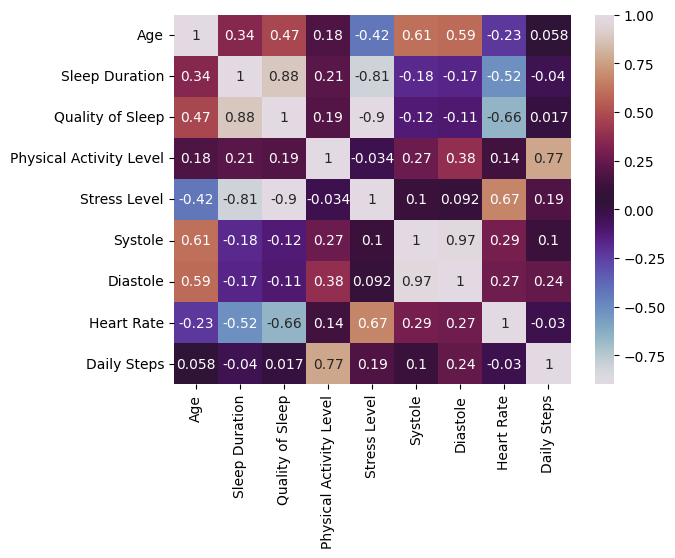

In [19]:
heatmap = sns.heatmap(data.corr(numeric_only=True, method='pearson'),
                      annot=True, cmap='twilight')
plt.show()

Pairplot variables with strong correlations

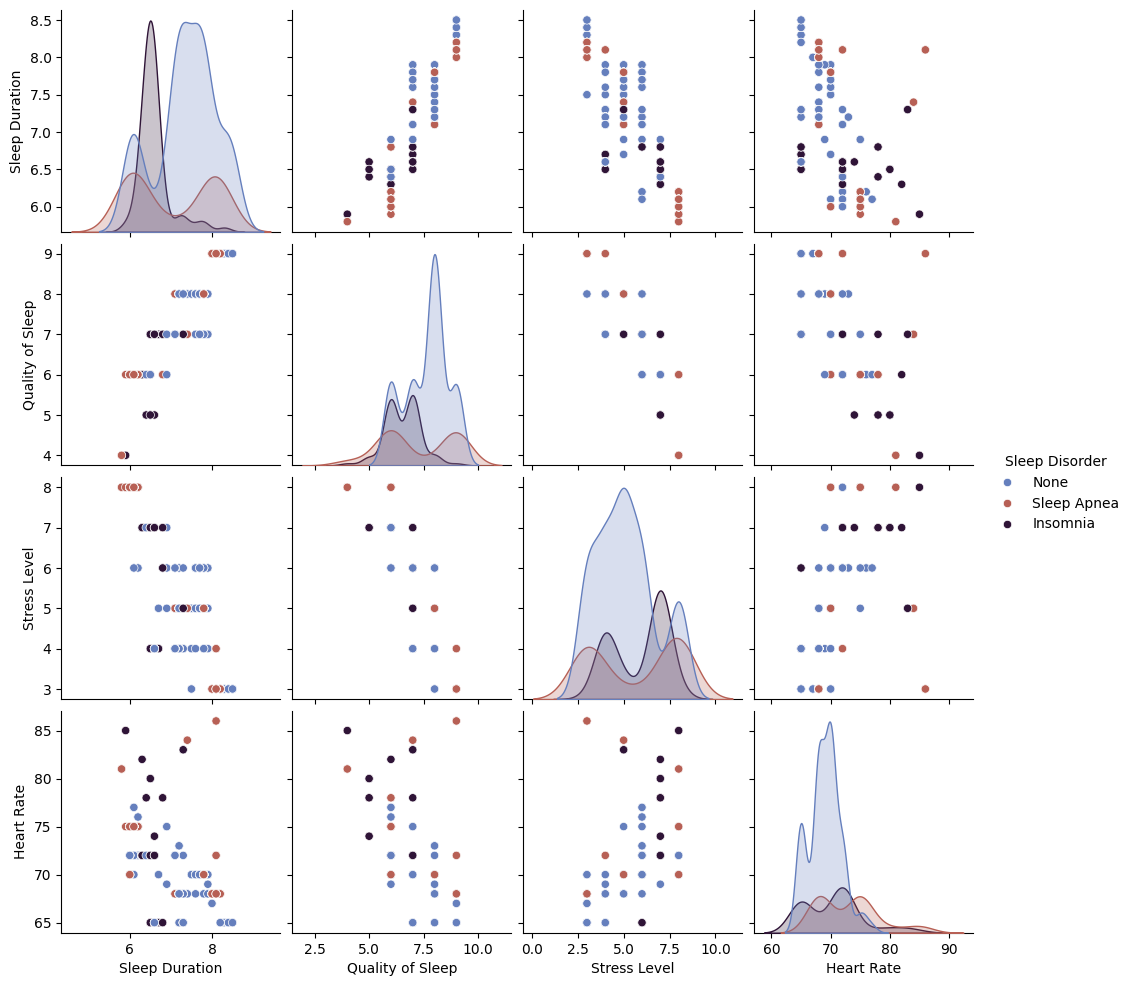

In [20]:
strong_corr = ['Sleep Duration',
               'Quality of Sleep',
               'Stress Level',
               'Heart Rate',
               'Sleep Disorder']

sns.pairplot(data=data[strong_corr], hue='Sleep Disorder',
             palette=['#657fbd', '#b76055', '#2f1437'])
plt.show()